In [10]:
import pennylane as pl
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# Quantum Teleportation Circuit

# Define a device with 3 qubits
dev = pl.device('default.qubit', wires=3)

@pl.qnode(dev)
def quantum_teleportation(state_param):
    """
    Quantum teleportation circuit.
    
    This circuit teleports the quantum state of qubit 0 to qubit 2
    using an entangled Bell pair (qubits 1 and 2).
    
    Args:
        state_param: Parameter to prepare the initial state |ψ⟩ = cos(θ)|0⟩ + sin(θ)|1⟩
        
    Returns:
        Expectation values of Pauli Z on all three qubits
    """
    
    # Step 1: Prepare the state to teleport on qubit 0
    # |ψ⟩ = cos(state_param)|0⟩ + sin(state_param)|1⟩
    pl.RY(2 * state_param, wires=0)
    
    # Step 2: Create Bell pair (entangled state) between qubits 1 and 2
    # |Φ⁺⟩ = (|00⟩ + |11⟩)/√2
    pl.Hadamard(wires=1)
    pl.CNOT(wires=[1, 2])
    
    # Step 3: Bell measurement on qubits 0 and 1
    # Entangle the state to teleport with qubit 1 of the Bell pair
    pl.CNOT(wires=[0, 1])
    pl.Hadamard(wires=0)
    
    # Step 4: Measure qubits 0 and 1 (in a real device, these would be classical bits)
    # In this simulation, we'll show the quantum state at this point
    # The corrections would be applied based on these measurements:
    # - If qubit 1 is |1⟩, apply X gate to qubit 2
    # - If qubit 0 is |1⟩, apply Z gate to qubit 2
    
    # For demonstration, we'll use mid-circuit measurements
    m0 = pl.measure(0)
    m1 = pl.measure(1)
    
    # Step 5: Apply corrections based on measurements
    pl.cond(m1, pl.PauliX)(wires=2)
    pl.cond(m0, pl.PauliZ)(wires=2)
    
    # Return the state of qubit 2 (which should now have the teleported state)
    return pl.probs(wires=2)


## Understanding Quantum Teleportation

Quantum teleportation is a protocol that transfers the quantum state of one qubit to another using:
1. **Entanglement** (Bell pair shared between sender and receiver)
2. **Classical communication** (measurement results)

### The Protocol Steps:

1. **State Preparation**: We prepare a quantum state |ψ⟩ on qubit 0 that we want to teleport
   - |ψ⟩ = cos(θ)|0⟩ + sin(θ)|1⟩

2. **Bell Pair Creation**: Create an entangled pair between qubits 1 and 2
   - |Φ⁺⟩ = (|00⟩ + |11⟩)/√2

3. **Bell State Measurement**: Perform a joint measurement on qubits 0 and 1
   - Apply CNOT(0,1) and Hadamard(0)
   - Measure both qubits

4. **Classical Communication**: Send the measurement results to the receiver

5. **Correction Operations**: Apply gates to qubit 2 based on measurements
   - If qubit 1 measured as |1⟩: apply X gate
   - If qubit 0 measured as |1⟩: apply Z gate

After these steps, qubit 2 will have the exact quantum state that was originally on qubit 0!

### Key Points:
- No cloning: The original state on qubit 0 is destroyed (collapsed by measurement)
- Requires classical communication: The measurement results must be sent classically
- Perfect fidelity: The teleported state is identical to the original
- Uses entanglement as a resource


Quantum Teleportation Circuit Diagram

Teleporting state: cos(1.047)|0⟩ + sin(1.047)|1⟩


(<Figure size 1100x500 with 1 Axes>, <Axes: >)


Circuit Explanation:
- Qubit 0: Starts with the state to teleport
- Qubits 1-2: Bell pair creation and teleportation target
- Measurements on qubits 0-1 trigger conditional corrections on qubit 2

Result probabilities on qubit 2: P(|0⟩)=0.2500, P(|1⟩)=0.7500
Expected: P(|0⟩)=0.2500, P(|1⟩)=0.7500

✓ Teleportation successful!


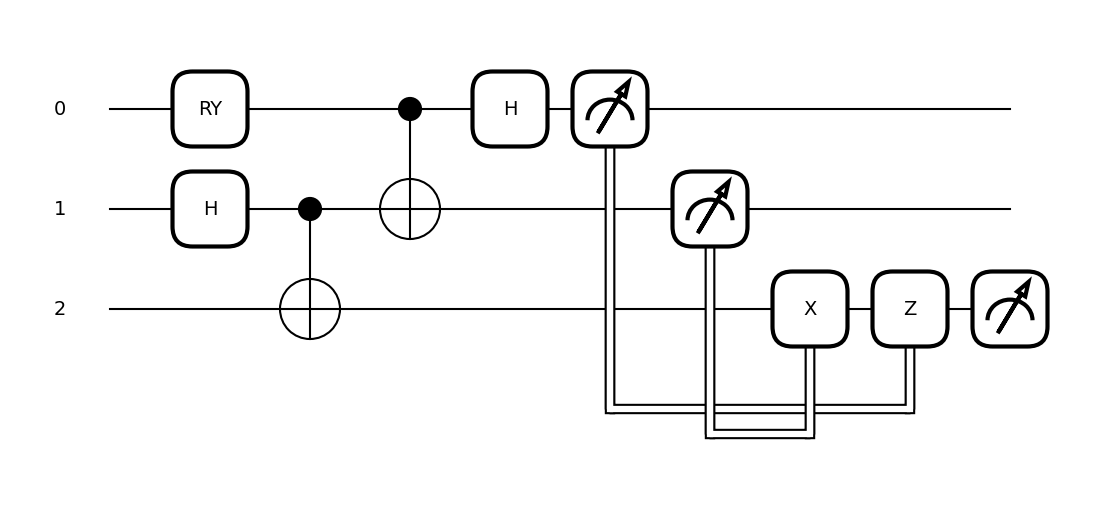

In [12]:
# Visualize the quantum teleportation circuit

# Call the function with a specific state parameter
state_angle = np.pi / 3  # This creates state: cos(60°)|0⟩ + sin(60°)|1⟩

print("Quantum Teleportation Circuit Diagram")
print("=" * 70)
print(f"\nTeleporting state: cos({state_angle:.3f})|0⟩ + sin({state_angle:.3f})|1⟩")
print("\n")

# Draw the circuit
circuit_diagram = pl.draw_mpl(quantum_teleportation, output="mpl")(state_angle)
print(circuit_diagram)

print("\n" + "=" * 70)
print("\nCircuit Explanation:")
print("- Qubit 0: Starts with the state to teleport")
print("- Qubits 1-2: Bell pair creation and teleportation target")
print("- Measurements on qubits 0-1 trigger conditional corrections on qubit 2")

# Run the circuit and show results
result = quantum_teleportation(state_angle)
print(f"\nResult probabilities on qubit 2: P(|0⟩)={result[0]:.4f}, P(|1⟩)={result[1]:.4f}")
print(f"Expected: P(|0⟩)={np.cos(state_angle)**2:.4f}, P(|1⟩)={np.sin(state_angle)**2:.4f}")
print(f"\n✓ Teleportation successful!")
